In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("Tetuan City power consumption.csv")
df.head().style.background_gradient(cmap = 'Blues', axis = 0)

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
0,1/1/2017 0:00,6.559000,73.800000,0.083000,0.051000,0.119000,34055.696200,16128.875380,20240.963860
1,1/1/2017 0:10,6.414000,74.500000,0.083000,0.070000,0.085000,29814.683540,19375.075990,20131.084340
2,1/1/2017 0:20,6.313000,74.500000,0.080000,0.062000,0.100000,29128.101270,19006.686930,19668.433730
3,1/1/2017 0:30,6.121000,75.000000,0.083000,0.091000,0.096000,28228.860760,18361.094220,18899.277110
4,1/1/2017 0:40,5.921000,75.700000,0.081000,0.048000,0.085000,27335.696200,17872.340430,18442.409640


In [3]:
df['DateTime'] = pd.to_datetime(df['DateTime'])
type(df['DateTime'])

pandas.core.series.Series

In [4]:
df.isnull().sum()

DateTime                     0
Temperature                  0
Humidity                     0
Wind Speed                   0
general diffuse flows        0
diffuse flows                0
Zone 1 Power Consumption     0
Zone 2  Power Consumption    0
Zone 3  Power Consumption    0
dtype: int64

In [5]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
DateTime,52416,2017-07-01 23:55:00,2017-01-01 00:00:00,2017-04-01 23:57:30,2017-07-01 23:55:00,2017-09-30 23:52:30,2017-12-30 23:50:00,NaN
Temperature,52416.0,18.810024,3.247,14.41,18.78,22.89,40.01,5.815476
Humidity,52416.0,68.259518,11.34,58.31,69.86,81.4,94.8,15.551177
Wind Speed,52416.0,1.959489,0.05,0.078,0.086,4.915,6.483,2.348862
general diffuse flows,52416.0,182.696614,0.004,0.062,5.0355,319.6,1163.0,264.40096
diffuse flows,52416.0,75.028022,0.011,0.122,4.456,101.0,936.0,124.210949
Zone 1 Power Consumption,52416.0,32344.970564,13895.6962,26310.668692,32265.92034,37309.018185,52204.39512,7130.562564
Zone 2 Power Consumption,52416.0,21042.509082,8560.081466,16980.766032,20823.168405,24713.71752,37408.86076,5201.465892
Zone 3 Power Consumption,52416.0,17835.406218,5935.17407,13129.32663,16415.11747,21624.10042,47598.32636,6622.165099


In [6]:
print(df['Zone 1 Power Consumption'].var())
print(df['Zone 2  Power Consumption'].var())
print(df['Zone 3  Power Consumption'].var())

50844922.48195016
27055247.427501082
43853070.60166617


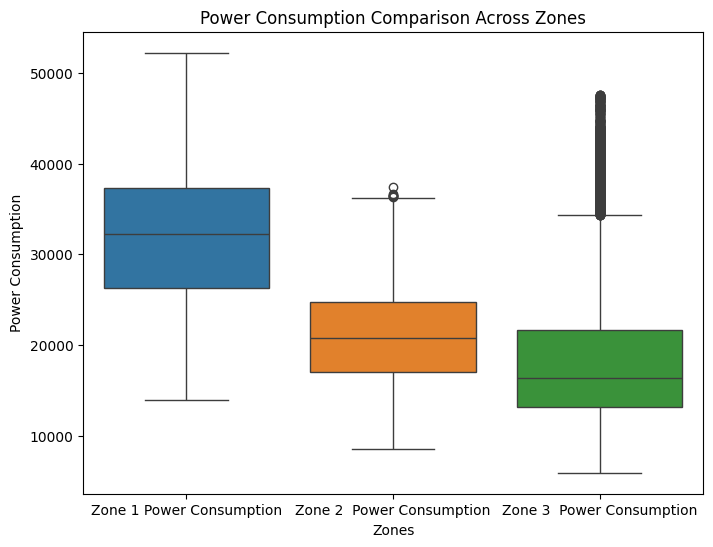

In [7]:
# Create a DataFrame with the power consumption data
zone_columns = ['Zone 1 Power Consumption', 'Zone 2  Power Consumption', 'Zone 3  Power Consumption']
data = df[zone_columns]

# Plotting a boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=data)
plt.title('Power Consumption Comparison Across Zones')
plt.xlabel('Zones')
plt.ylabel('Power Consumption')
plt.show()

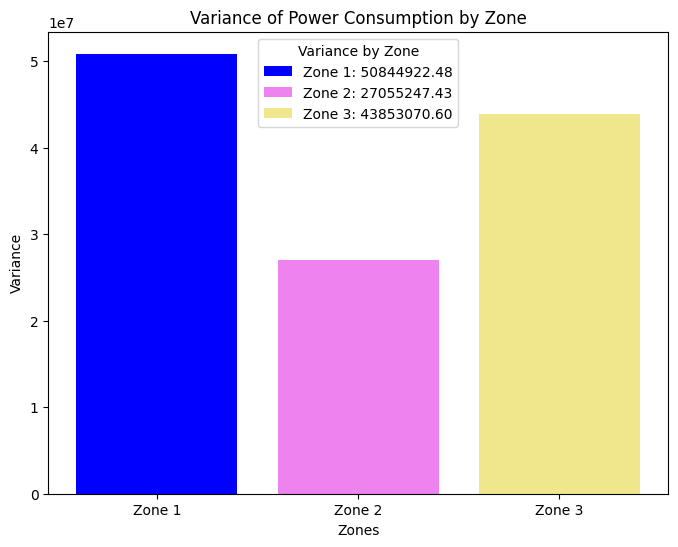

In [8]:

# Assuming df contains the data and variance is already calculated
zone_variances = {
    "Zone 1": df['Zone 1 Power Consumption'].var(),
    "Zone 2": df['Zone 2  Power Consumption'].var(),
    "Zone 3": df['Zone 3  Power Consumption'].var()
}
# Create bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(zone_variances.keys(), zone_variances.values(), color=['blue', 'violet', 'khaki'])
plt.title('Variance of Power Consumption by Zone')
plt.ylabel('Variance')
plt.xlabel('Zones')
# Add legend
# Add legend with variance values
variance_labels = [f"{zone}: {var:.2f}" for zone, var in zone_variances.items()]
plt.legend(bars, variance_labels, title="Variance by Zone")
plt.show()

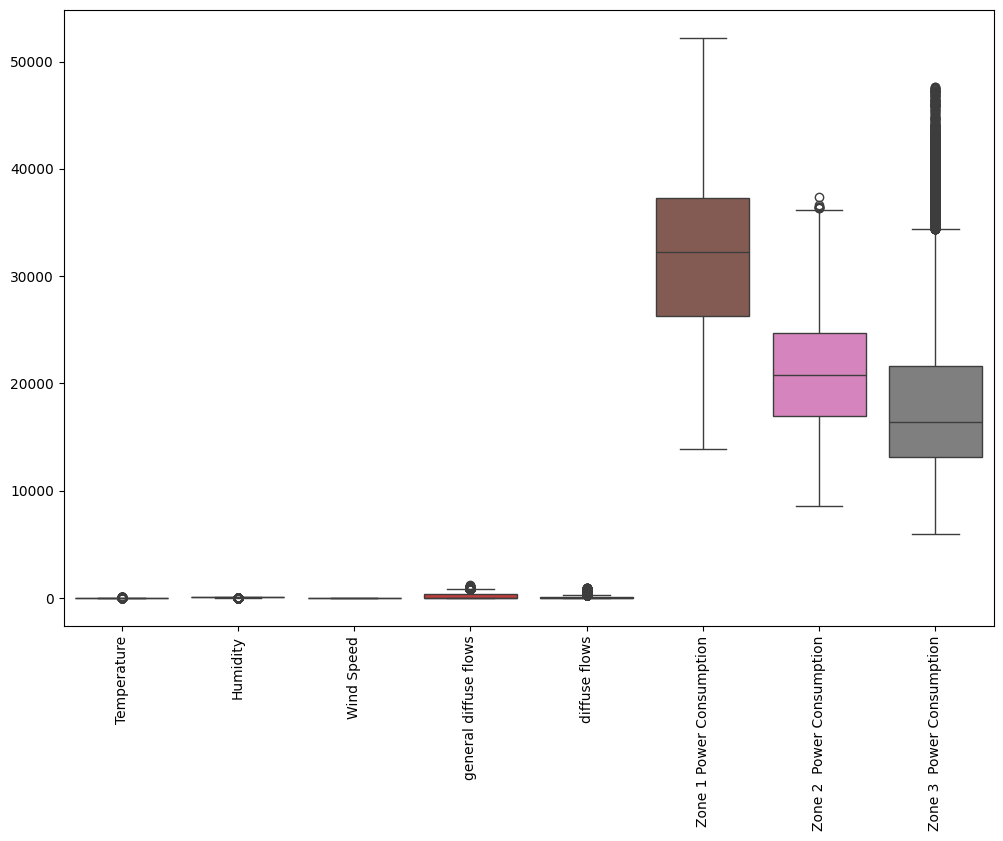

In [9]:
plt.figure(figsize=(12, 8))  # ปรับขนาดกราฟ
sns.boxplot(data=df)  # สร้าง boxplot สำหรับทุกคอลัมน์ใน df
plt.xticks(rotation=90)  # หมุนชื่อคอลัมน์ถ้าคอลัมน์เยอะ
plt.show()

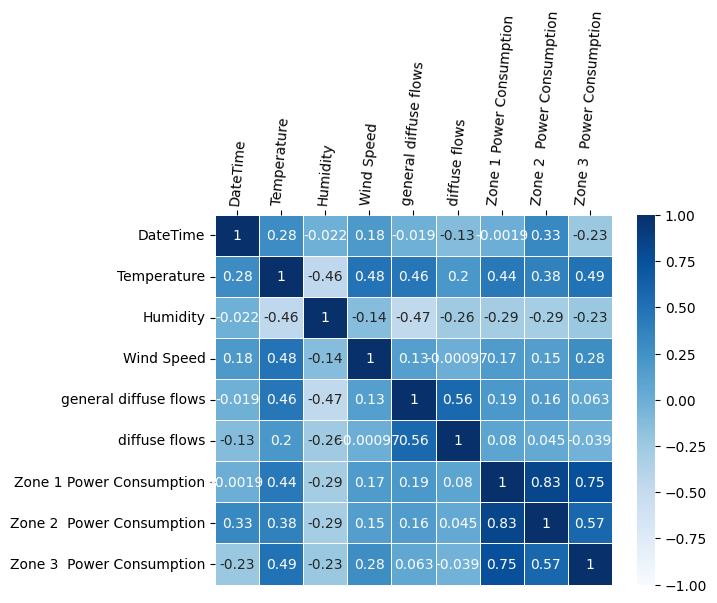

In [10]:
ax = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap="Blues", linewidth=.5)

ax.set(xlabel="", ylabel="")
ax.xaxis.tick_top()
plt.xticks(rotation = 85)
plt.show() 

In [11]:
df.columns

Index(['DateTime', 'Temperature', 'Humidity', 'Wind Speed',
       'general diffuse flows', 'diffuse flows', 'Zone 1 Power Consumption',
       'Zone 2  Power Consumption', 'Zone 3  Power Consumption'],
      dtype='object')

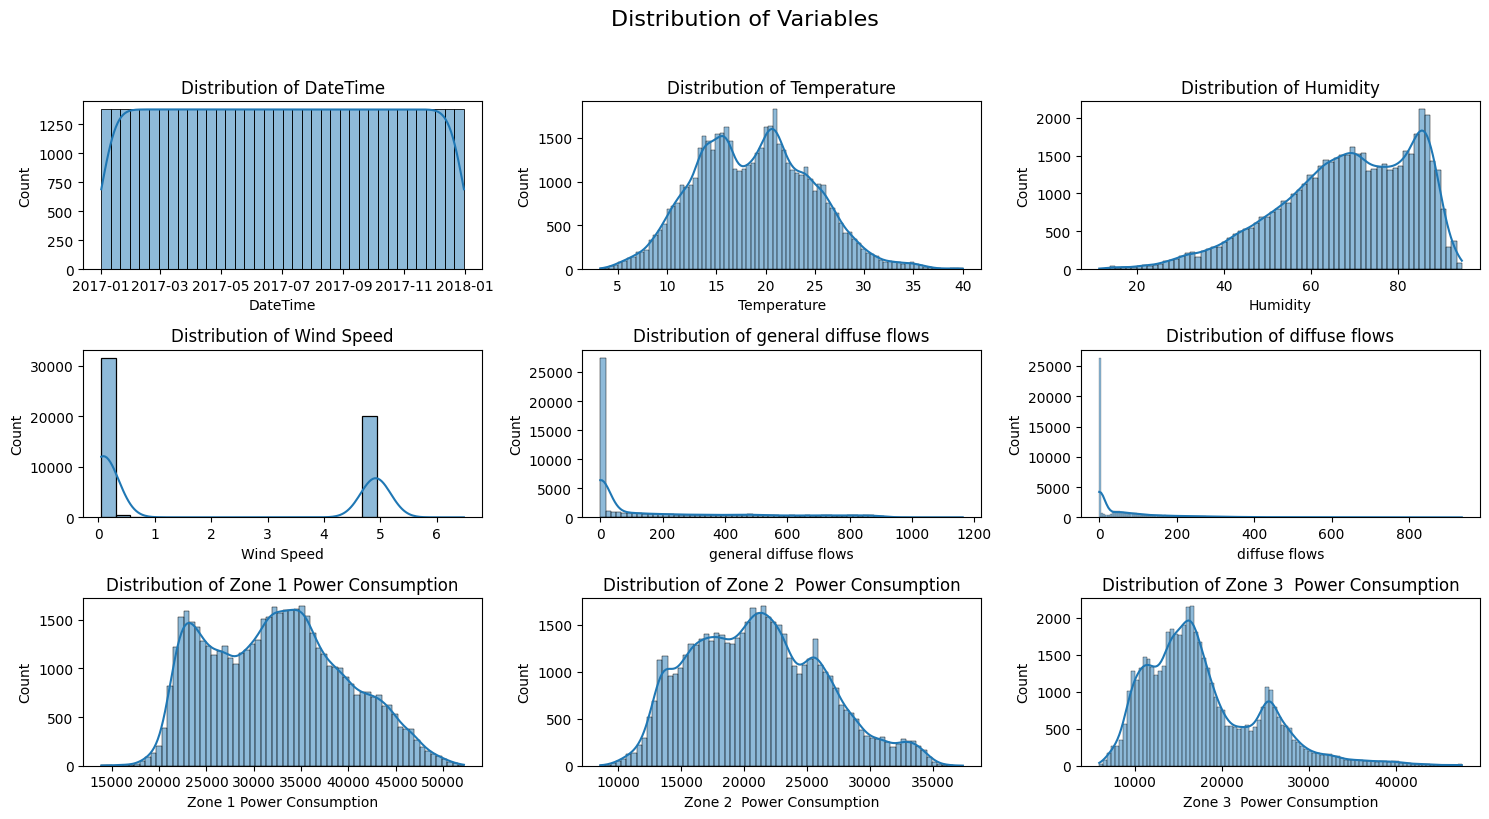

In [12]:

plt.figure(figsize=(15, 10))

num_vars = len(df.columns)
plt.suptitle('Distribution of Variables', fontsize=16, y=1.02)

for i, var in enumerate(df.columns, 1):
    plt.subplot((num_vars // 3) + 1, 3, i)
    sns.histplot(data=df, x=var, kde=True)
    plt.title(f'Distribution of {var}')
    

plt.tight_layout()
plt.show()

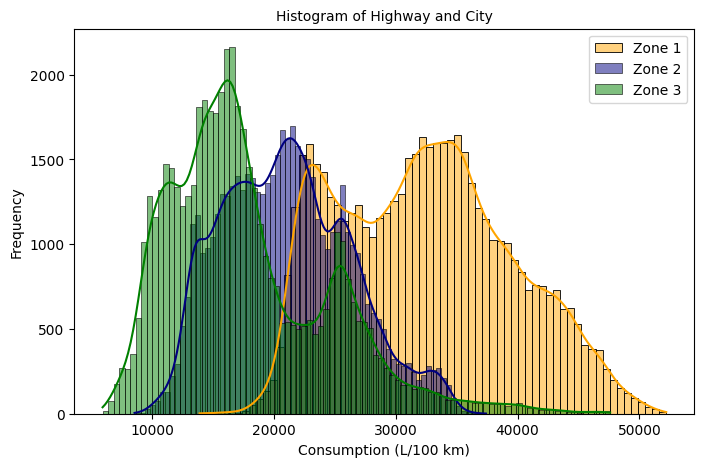

In [13]:
# Consumption of Highway and City

plt.figure(figsize=(8, 5))
sns.histplot(data=df, x="Zone 1 Power Consumption", kde=True, label = "Zone 1",color = "orange")
sns.histplot(data=df, x="Zone 2  Power Consumption", kde=True, label = "Zone 2",color= "navy")
sns.histplot(data=df, x='Zone 3  Power Consumption', kde=True, label="Zone 3", color= "green")
plt.xlabel('Consumption (L/100 km)', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.title(f'Histogram of Highway and City', fontsize=10)
plt.legend()
plt.show()

Each seasons

In [14]:
# กำหนดช่วงเวลา
spring_start_date = '2017-03-01 00:00'
spring_end_date = '2017-05-31 23:50'

# ดึงข้อมูลในช่วงที่ต้องการ
spring_df = df[(df['DateTime'] >= spring_start_date) & (df['DateTime'] <= spring_end_date)]

In [15]:
summer_start_date = '2017-06-01 00:00'
summer_end_date = '2017-08-31 23:50'

summer_df = df[(df['DateTime'] >= summer_start_date) & (df['DateTime'] <= summer_end_date)]

In [16]:
autumn_start_date = '2017-09-01 00:00'
autumn_end_date = '2017-11-30 23:50'

autumn_df = df[(df['DateTime'] >= autumn_start_date) & (df['DateTime'] <= autumn_end_date)]

In [17]:
old_winter_start_date = '2017-01-01 00:00'
old_winter_end_date = '2017-02-28 23:50'

old_winter_df = df[(df['DateTime'] >= old_winter_start_date) & (df['DateTime'] <= old_winter_end_date)]

new_winter_start_date = '2017-12-01 00:00'
new_winter_end_date = '2017-12-31 23:50'

new_winter_df = df[(df['DateTime'] >= new_winter_start_date) & (df['DateTime'] <= new_winter_end_date)]

all_winter_df = pd.concat([old_winter_df, new_winter_df])

CLT for spring

In [18]:
zone1_spring = spring_df['Zone 1 Power Consumption'].to_numpy()
zone2_spring = spring_df['Zone 2  Power Consumption'].to_numpy()
zone3_spring = spring_df['Zone 3  Power Consumption'].to_numpy()

In [19]:
# ตั้งค่าพารามิเตอร์
sample_size = 30  # ขนาดตัวอย่าง
num_samples = 1000 # จำนวนการสุ่มตัวอย่าง

# ฟังก์ชันสุ่มตัวอย่างและคำนวณค่าเฉลี่ย
def compute_sample_means(data):
    sample_means = []
    for _ in range(num_samples):
        sample = np.random.choice(data, size=sample_size, replace=False)  # สุ่มตัวอย่าง
        sample_means.append(np.mean(sample))  # คำนวณค่าเฉลี่ย
    return sample_means

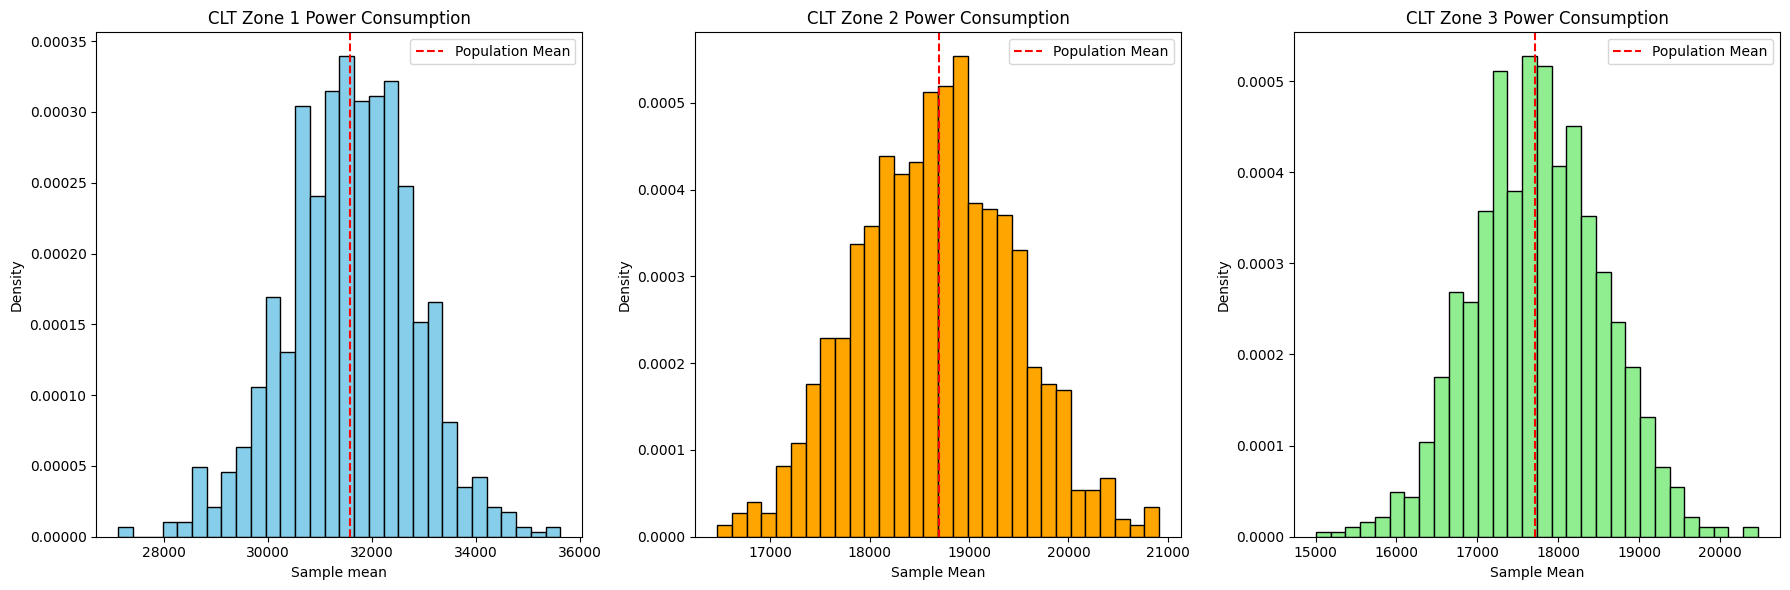

In [20]:
# คำนวณค่าเฉลี่ยตัวอย่างสำหรับแต่ละโซน
sample_means_zone1 = compute_sample_means(zone1_spring)
sample_means_zone2 = compute_sample_means(zone2_spring)
sample_means_zone3 = compute_sample_means(zone3_spring)

# สร้างกราฟ 3 ตัวใน 1 แถว 3 คอลัมน์
plt.figure(figsize=(18, 6))

# กราฟที่ 1: การแจกแจงของประชากร (Original Population) สำหรับ zone1_spring
plt.subplot(1, 3, 1)
plt.hist(sample_means_zone1, bins=30, color='skyblue', edgecolor='black', density=True)
plt.title('CLT Zone 1 Power Consumption')
plt.xlabel('Sample mean')
plt.ylabel('Density')
plt.axvline(np.mean(zone1_spring), color='red', linestyle='dashed', label='Population Mean')
plt.legend()

# กราฟที่ 2: การแจกแจงของค่าเฉลี่ยตัวอย่าง (Sample Means Distribution) สำหรับ zone2_spring
plt.subplot(1, 3, 2)
plt.hist(sample_means_zone2, bins=30, color='orange', edgecolor='black', density=True)
plt.title('CLT Zone 2 Power Consumption')
plt.xlabel('Sample Mean')
plt.ylabel('Density')
plt.axvline(np.mean(zone2_spring), color='red', linestyle='dashed', label='Population Mean')
plt.legend()

# กราฟที่ 3: การแจกแจงของค่าเฉลี่ยตัวอย่าง (Sample Means Distribution) สำหรับ zone3_spring
plt.subplot(1, 3, 3)
plt.hist(sample_means_zone3, bins=30, color='lightgreen', edgecolor='black', density=True)
plt.title('CLT Zone 3 Power Consumption')
plt.xlabel('Sample Mean')
plt.ylabel('Density')
plt.axvline(np.mean(zone3_spring), color='red', linestyle='dashed', label='Population Mean')
plt.legend()

# ปรับแต่งกราฟให้เหมาะสม
plt.tight_layout()
plt.show()

CLT summer

In [21]:
zone1_summer = summer_df['Zone 1 Power Consumption'].to_numpy()
zone2_summer = summer_df['Zone 2  Power Consumption'].to_numpy()
zone3_summer = summer_df['Zone 3  Power Consumption'].to_numpy()

In [22]:
# คำนวณค่าเฉลี่ยตัวอย่างสำหรับแต่ละโซน
sample_means_zone1_summer = compute_sample_means(zone1_summer)
sample_means_zone2_summer = compute_sample_means(zone2_summer)
sample_means_zone3_summer = compute_sample_means(zone3_summer)

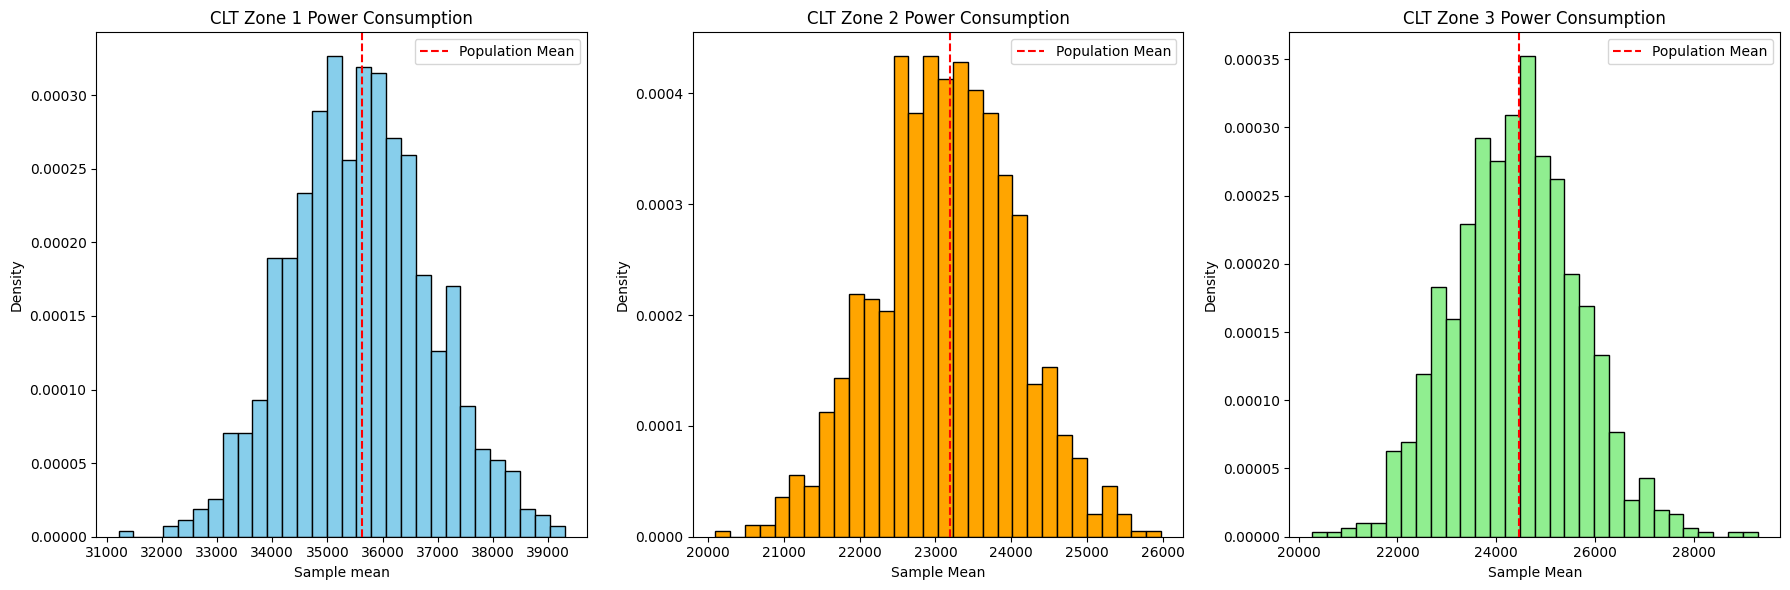

In [23]:
# สร้างกราฟ 3 ตัวใน 1 แถว 3 คอลัมน์
plt.figure(figsize=(18, 6))

# กราฟที่ 1: การแจกแจงของประชากร (Original Population) สำหรับ zone1_spring
plt.subplot(1, 3, 1)
plt.hist(sample_means_zone1_summer, bins=30, color='skyblue', edgecolor='black', density=True)
plt.title('CLT Zone 1 Power Consumption')
plt.xlabel('Sample mean')
plt.ylabel('Density')
plt.axvline(np.mean(zone1_summer), color='red', linestyle='dashed', label='Population Mean')
plt.legend()

# กราฟที่ 2: การแจกแจงของค่าเฉลี่ยตัวอย่าง (Sample Means Distribution) สำหรับ zone2_spring
plt.subplot(1, 3, 2)
plt.hist(sample_means_zone2_summer, bins=30, color='orange', edgecolor='black', density=True)
plt.title('CLT Zone 2 Power Consumption')
plt.xlabel('Sample Mean')
plt.ylabel('Density')
plt.axvline(np.mean(zone2_summer), color='red', linestyle='dashed', label='Population Mean')
plt.legend()

# กราฟที่ 3: การแจกแจงของค่าเฉลี่ยตัวอย่าง (Sample Means Distribution) สำหรับ zone3_spring
plt.subplot(1, 3, 3)
plt.hist(sample_means_zone3_summer, bins=30, color='lightgreen', edgecolor='black', density=True)
plt.title('CLT Zone 3 Power Consumption')
plt.xlabel('Sample Mean')
plt.ylabel('Density')
plt.axvline(np.mean(zone3_summer), color='red', linestyle='dashed', label='Population Mean')
plt.legend()

# ปรับแต่งกราฟให้เหมาะสม
plt.tight_layout()
plt.show()

CLT Autumn

In [24]:
zone1_autumn = autumn_df['Zone 1 Power Consumption'].to_numpy()
zone2_autumn = autumn_df['Zone 2  Power Consumption'].to_numpy()
zone3_autumn = autumn_df['Zone 3  Power Consumption'].to_numpy()

In [25]:
# คำนวณค่าเฉลี่ยตัวอย่างสำหรับแต่ละโซน
sample_means_zone1_autumn = compute_sample_means(zone1_autumn)
sample_means_zone2_autumn = compute_sample_means(zone2_autumn)
sample_means_zone3_autumn = compute_sample_means(zone3_autumn)

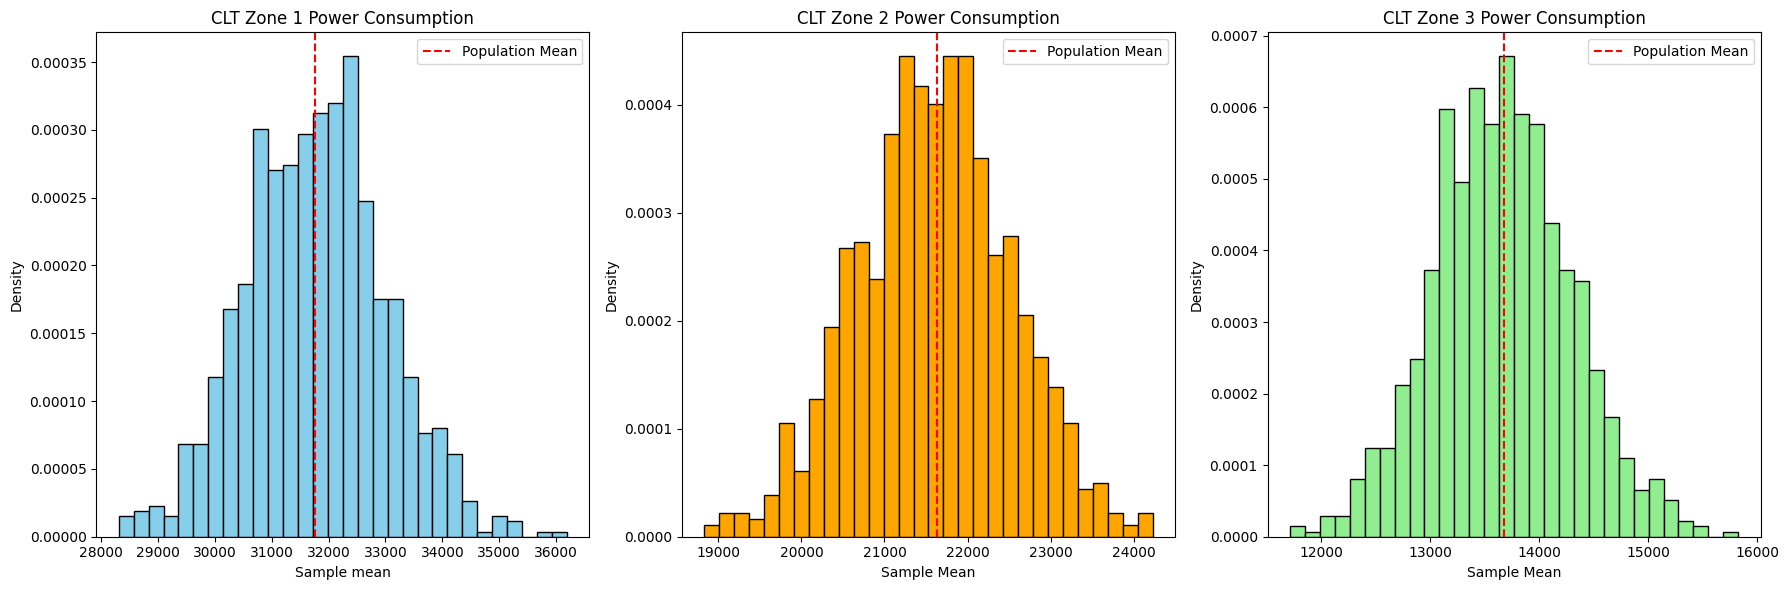

In [26]:
# สร้างกราฟ 3 ตัวใน 1 แถว 3 คอลัมน์
plt.figure(figsize=(18, 6))

# กราฟที่ 1: การแจกแจงของประชากร (Original Population) สำหรับ zone1_spring
plt.subplot(1, 3, 1)
plt.hist(sample_means_zone1_autumn, bins=30, color='skyblue', edgecolor='black', density=True)
plt.title('CLT Zone 1 Power Consumption')
plt.xlabel('Sample mean')
plt.ylabel('Density')
plt.axvline(np.mean(zone1_autumn), color='red', linestyle='dashed', label='Population Mean')
plt.legend()

# กราฟที่ 2: การแจกแจงของค่าเฉลี่ยตัวอย่าง (Sample Means Distribution) สำหรับ zone2_spring
plt.subplot(1, 3, 2)
plt.hist(sample_means_zone2_autumn, bins=30, color='orange', edgecolor='black', density=True)
plt.title('CLT Zone 2 Power Consumption')
plt.xlabel('Sample Mean')
plt.ylabel('Density')
plt.axvline(np.mean(zone2_autumn), color='red', linestyle='dashed', label='Population Mean')
plt.legend()

# กราฟที่ 3: การแจกแจงของค่าเฉลี่ยตัวอย่าง (Sample Means Distribution) สำหรับ zone3_spring
plt.subplot(1, 3, 3)
plt.hist(sample_means_zone3_autumn, bins=30, color='lightgreen', edgecolor='black', density=True)
plt.title('CLT Zone 3 Power Consumption')
plt.xlabel('Sample Mean')
plt.ylabel('Density')
plt.axvline(np.mean(zone3_autumn), color='red', linestyle='dashed', label='Population Mean')
plt.legend()

# ปรับแต่งกราฟให้เหมาะสม
plt.tight_layout()
plt.show()

CLT winter

In [27]:
zone1_winter = all_winter_df['Zone 1 Power Consumption'].to_numpy()
zone2_winter = all_winter_df['Zone 2  Power Consumption'].to_numpy()
zone3_winter = all_winter_df['Zone 3  Power Consumption'].to_numpy()

In [28]:
# คำนวณค่าเฉลี่ยตัวอย่างสำหรับแต่ละโซน
sample_means_zone1_winter = compute_sample_means(zone1_winter)
sample_means_zone2_winter = compute_sample_means(zone2_winter)
sample_means_zone3_winter = compute_sample_means(zone3_winter)

In [29]:
df = pd.read_csv("Tetuan City power consumption.csv", parse_dates=[0])

Feature Engineering

In [30]:
df = df.rename(columns={'Zone 1 Power Consumption':'zone 1', 'Zone 2  Power Consumption':'zone 2','Zone 3  Power Consumption':'zone 3' })
df['Total_all_zone'] = df['zone 1'] + df['zone 2'] + df['zone 3']
# Extract month
df['Month'] = df['DateTime'].dt.month

# Function to assign seasons based on specific month groupings
def assign_season(month):
    if month in [1, 2]:
        return 'Winter (1-2)'
    elif month in [3, 4, 5]:
        return 'Spring (3-5)'
    elif month in [6, 7, 8]:
        return 'Summer (6-8)'
    elif month in [9, 10, 11]:
        return 'Autumn (9-11)'
    else:  # month == 12
        return 'Winter (12)'

df['Season'] = df['Month'].apply(assign_season)

In [31]:
df2 = df.copy()

Model Linear Regression

In [32]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [33]:
df = df.drop(['DateTime'], axis=1)
df_encoded = pd.get_dummies(df, columns=['Season'])

In [34]:
data_log = np.log1p(df_encoded)

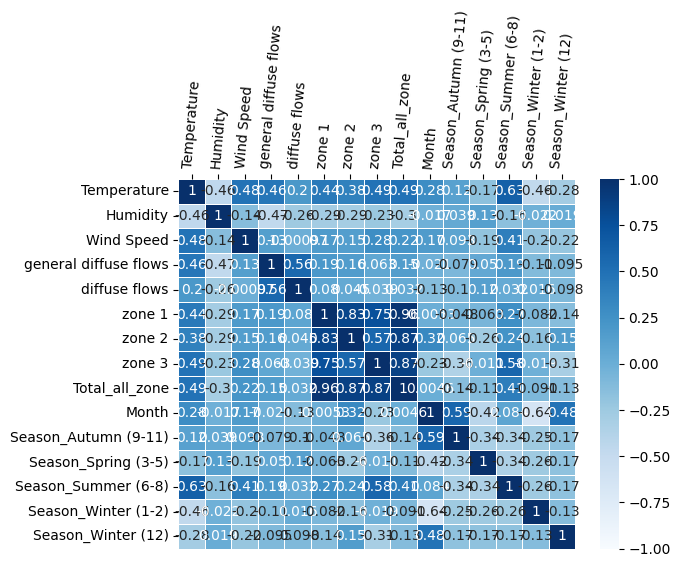

In [35]:
ax = sns.heatmap(df_encoded.corr(), vmin=-1, vmax=1, annot=True, cmap="Blues", linewidth=.5)

ax.set(xlabel="", ylabel="")
ax.xaxis.tick_top()
plt.xticks(rotation = 85)
plt.show() 

In [36]:
# std = MinMaxScaler()
# # Fit the scaler to the DataFrame and transform the data
# df_scaled = std.fit_transform(df_encoded)

# # Optionally, convert the scaled data back to a DataFrame
# df_scaled = pd.DataFrame(df_scaled, columns=df_encoded.columns)

In [37]:
# x_sp = df.drop(['Zone 1 Power Consumption', 'Zone 2  Power Consumption', 'Zone 3  Power Consumption'], axis=1)

In [38]:
# X_spring = spring_df.drop(['Zone 1 Power Consumption', 'Zone 2  Power Consumption', 'Zone 3  Power Consumption'], axis=1)
# y_spring_1 = spring_df['Zone 1 Power Consumption']
# y_spring_2 = spring_df['Zone 2  Power Consumption']
# y_spring_3 = spring_df['Zone 3  Power Consumption']

In [39]:
# X_train_1sp, X_test_1sp, y_train_1sp, y_test_1sp = train_test_split(X_spring, y_spring_1, test_size=0.2, random_state=42)

In [40]:
X = data_log.drop(['zone 1', 'zone 2', 'zone 3'], axis=1)
y = data_log[['zone 1', 'zone 2', 'zone 3']]

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
linear_model = LinearRegression(fit_intercept=False)
linear_model.fit(X_train, y_train)

LinearRegression(fit_intercept=False)

In [43]:
# ค่าพารามิเตอร์ที่ดีที่สุด (coefficients และ intercept)
print(f"Coefficients: {linear_model.coef_}")
print(f"Intercept: {linear_model.intercept_}")

Coefficients: [[ 2.86503588e-02  3.15441142e-02 -1.90283933e-03  5.48348084e-03
   1.37071711e-03  9.44643857e-01 -7.69491136e-02 -2.67494111e-01
  -3.82130775e-01 -4.34563692e-01 -4.62486169e-01 -2.87269917e-01]
 [-9.90554696e-02 -1.33228938e-02 -5.65358176e-03  6.16094285e-03
   5.08920600e-03  1.02012994e+00  1.47268215e-01 -1.98838527e+00
  -2.07593070e+00 -2.11059390e+00 -1.91904194e+00 -1.87443253e+00]
 [ 9.09215039e-02 -3.26421214e-02  7.96476747e-03 -1.78834212e-02
  -9.87016994e-03  1.06441934e+00 -5.27345211e-02 -3.26843093e+00
  -2.92804031e+00 -2.80607850e+00 -2.97218345e+00 -3.43384998e+00]]
Intercept: 0.0


In [44]:
# หาค่าพารามิเตอร์ (MLE) จาก pipeline
beta_mle = linear_model.coef_  # ดึง coefficient จากโมเดลใน pipeline
y_pred = linear_model.predict(X_test)            # คำนวณ y_pred จาก pipeline
sigma_squared_mle = np.mean((y_test - y_pred) ** 2)  # คำนวณ sigma^2 ด้วย residual

# แสดงผลลัพธ์
print("Estimated beta (MLE):", beta_mle)
print("Estimated sigma^2 (MLE):", sigma_squared_mle)

Estimated beta (MLE): [[ 2.86503588e-02  3.15441142e-02 -1.90283933e-03  5.48348084e-03
   1.37071711e-03  9.44643857e-01 -7.69491136e-02 -2.67494111e-01
  -3.82130775e-01 -4.34563692e-01 -4.62486169e-01 -2.87269917e-01]
 [-9.90554696e-02 -1.33228938e-02 -5.65358176e-03  6.16094285e-03
   5.08920600e-03  1.02012994e+00  1.47268215e-01 -1.98838527e+00
  -2.07593070e+00 -2.11059390e+00 -1.91904194e+00 -1.87443253e+00]
 [ 9.09215039e-02 -3.26421214e-02  7.96476747e-03 -1.78834212e-02
  -9.87016994e-03  1.06441934e+00 -5.27345211e-02 -3.26843093e+00
  -2.92804031e+00 -2.80607850e+00 -2.97218345e+00 -3.43384998e+00]]
Estimated sigma^2 (MLE): 0.005319015706609272


In [45]:
flat_beta = beta_mle.flatten()  # แปลงเป็น 1D array
best_feature_index = np.argmax(np.abs(flat_beta))  # หาค่า index ที่ค่าสัมบูรณ์มากที่สุด
best_coefficient = flat_beta[best_feature_index]  # ดึงค่าที่ดีที่สุดออกมา

print("Best Coefficient:", best_coefficient)
print("Index in flattened array:", best_feature_index)

Best Coefficient: -3.4338499845256747
Index in flattened array: 35


In [46]:
min_coef = np.min(beta_mle)
max_coef = np.max(beta_mle)

print(f'min_coef: {min_coef}')
print(f'max_coef: {max_coef}')
print(f"Intercept: {linear_model.intercept_}")

min_coef: -3.4338499845256747
max_coef: 1.064419335595578
Intercept: 0.0


In [47]:
print('score:', r2_score(y_test, y_pred))
mae_log =  mean_absolute_error(y_test, y_pred)
mse_log =  mean_squared_error(y_test, y_pred)
# แปลง MSE และ MAE กลับไปยังค่าปกติ
mse_original = np.expm1(mse_log) 
mae_original = np.expm1(mae_log)

print('MAE:', mae_log)
print('MSE:', mse_log)
print('RMSE:', np.sqrt(mse_log))

score: 0.9375471302822035
MAE: 0.05420689122483024
MSE: 0.005319015706609261
RMSE: 0.07293158236737539


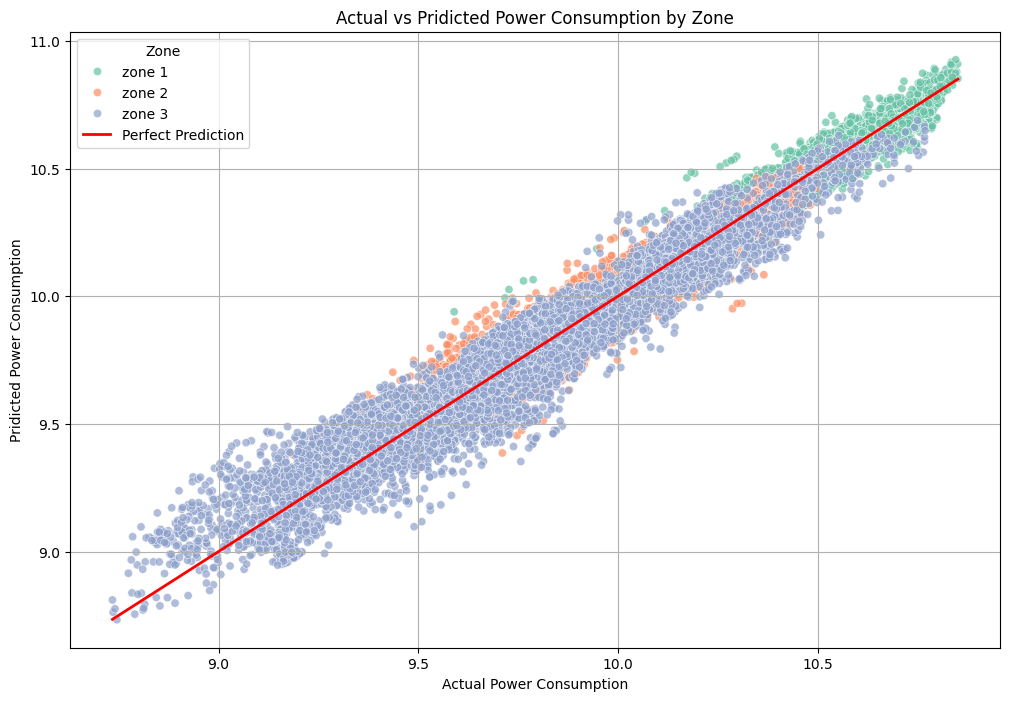

In [48]:
# แปลง y_test และ y_pred เป็น DataFrame
y_test_df = pd.DataFrame(y_test, columns=['zone 1', 'zone 2', 'zone 3'])
y_pred_df = pd.DataFrame(y_pred, columns=['zone 1', 'zone 2', 'zone 3'])

# แปลงข้อมูลเป็น long format สำหรับ plotting
actual_long = y_test_df.melt(var_name='Zone', value_name='Actual Power Consumption')
pred_long = y_pred_df.melt(var_name='Zone', value_name='Pridicted Power Consumption')

# รวมข้อมูลจริงและที่พยากรณ์
plot_data = actual_long.copy()
plot_data['Pridicted Power Consumption'] = pred_long['Pridicted Power Consumption']

# วาดกราฟเปรียบเทียบ
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=plot_data,
    x='Actual Power Consumption',
    y='Pridicted Power Consumption',
    hue='Zone',  # ใช้ hue แยกสีตามโซน
    palette='Set2',  # เลือกพาเลตสี
    alpha=0.7
)
plt.plot(
    [plot_data['Actual Power Consumption'].min(), plot_data['Actual Power Consumption'].max()],
    [plot_data['Actual Power Consumption'].min(), plot_data['Actual Power Consumption'].max()],
    color='red', linestyle='-', lw=2, label='Perfect Prediction'
)
plt.title('Actual vs Pridicted Power Consumption by Zone')
plt.xlabel('Actual Power Consumption')
plt.ylabel('Pridicted Power Consumption')
plt.legend(title='Zone')
plt.grid(True)
plt.show()

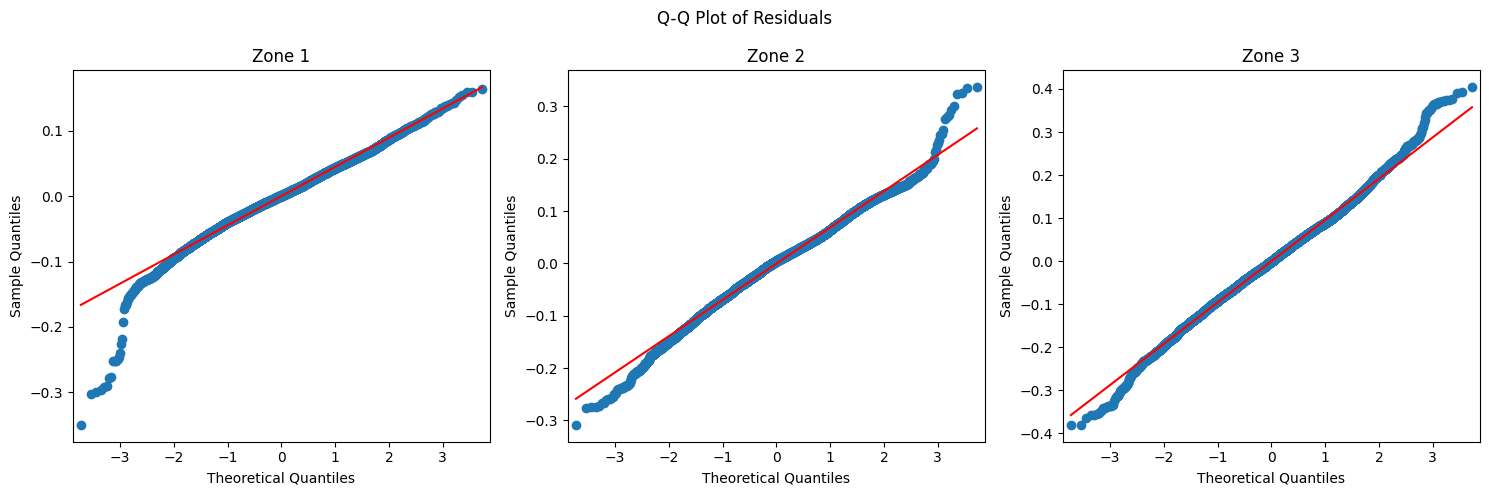

In [49]:
import statsmodels.api as sm

residuals = y_test - y_pred

fig, axs = plt.subplots(1, 3, figsize=(15, 5))  # สร้าง 3 subplots ใน 1 แถว
sm.qqplot(residuals['zone 1'], line='s', ax=axs[0])
axs[0].set_title('Zone 1')

sm.qqplot(residuals['zone 2'], line='s', ax=axs[1])
axs[1].set_title('Zone 2')

sm.qqplot(residuals['zone 3'], line='s', ax=axs[2])
axs[2].set_title('Zone 3')


plt.suptitle('Q-Q Plot of Residuals')
plt.tight_layout()
plt.show()

Mean Each Seasons

C:\Users\BM MONEY\AppData\Local\Temp\ipykernel_19356\4136135603.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Season', y='Total_all_zone', data=df, palette='Set2')


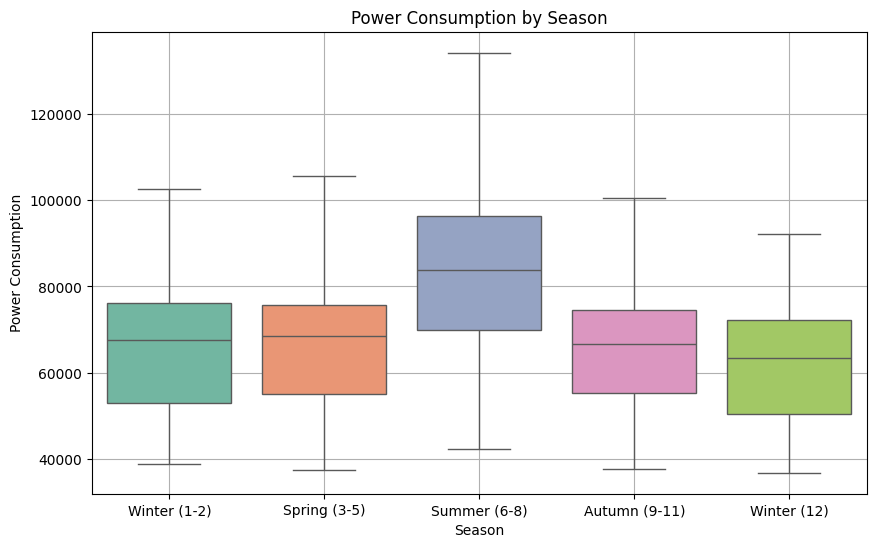

In [50]:
# สร้าง Boxplot เพื่อดูการกระจายของพลังงานในแต่ละฤดู
plt.figure(figsize=(10, 6))
sns.boxplot(x='Season', y='Total_all_zone', data=df, palette='Set2')
plt.title('Power Consumption by Season')
plt.xlabel('Season')
plt.ylabel('Power Consumption')
plt.grid(True)
plt.show()


Seasonal Means and Standard Deviations:
               zone 1_mean  zone 1_std  zone 2_mean  zone 2_std  zone 3_mean  \
Season                                                                         
Winter (1-2)      31010.31     7152.71     19106.54     4470.57     17551.00   
Spring (3-5)      31578.04     6716.97     18701.21     4184.09     17711.17   
Summer (6-8)      35635.17     7157.89     23185.38     5182.00     24468.06   
Autumn (9-11)     31754.08     6599.70     21628.19     4941.03     13678.53   
Winter (12)       29024.17     6176.40     23681.85     5711.79     11044.81   

               zone 3_std  
Season                     
Winter (1-2)      4403.48  
Spring (3-5)      4435.61  
Summer (6-8)      7119.20  
Autumn (9-11)     3464.88  
Winter (12)       2853.39  


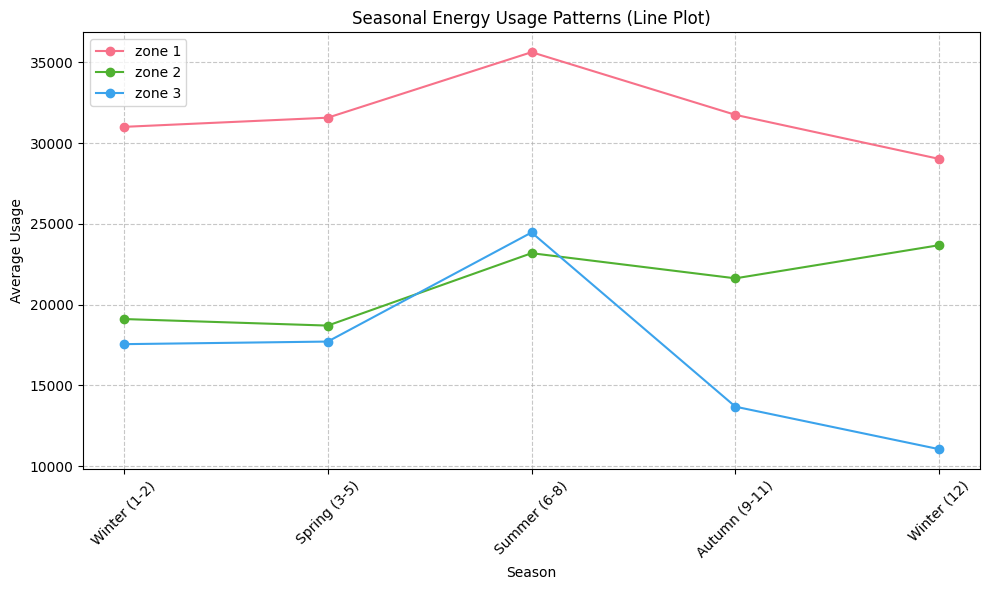

In [51]:
# Function to analyze and visualize seasonal patterns
def seasonal_energy_analysis(dataframe, columns_to_analyze):
    # Create a figure
    plt.figure(figsize=(10, 6))
    
    # Store results for all columns
    all_seasonal_means = pd.DataFrame()
    
    # Color palette for consistent colors across plots
    colors = sns.color_palette("husl", len(columns_to_analyze))
    
    # Calculate seasonal means for each column
    for idx, column in enumerate(columns_to_analyze):
        # Calculate seasonal means
        seasonal_means = df.groupby('Season')[column].agg(['mean', 'std']).round(2)
        seasonal_means = seasonal_means.reindex(['Winter (1-2)', 'Spring (3-5)', 
                                                 'Summer (6-8)', 'Autumn (9-11)', 
                                                 'Winter (12)'])
        
        # Store results
        if all_seasonal_means.empty:
            all_seasonal_means = seasonal_means.copy()
            all_seasonal_means.columns = [f'{column}_mean', f'{column}_std']
        else:
            all_seasonal_means[f'{column}_mean'] = seasonal_means['mean']
            all_seasonal_means[f'{column}_std'] = seasonal_means['std']
        
        # Plot line graph
        plt.plot(range(len(seasonal_means)), seasonal_means['mean'], 
                 marker='o', label=column, color=colors[idx])
    
    # Customize the line plot
    plt.xticks(range(len(seasonal_means)), seasonal_means.index, rotation=45)
    plt.title('Seasonal Energy Usage Patterns (Line Plot)')
    plt.xlabel('Season')
    plt.ylabel('Average Usage')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend(loc='upper left')
    
    plt.tight_layout()
    
    return all_seasonal_means

# Analyze the energy columns
energy_columns = ['zone 1', 'zone 2', 'zone 3']
seasonal_means = seasonal_energy_analysis(df, energy_columns)

# Display numerical results
print("\nSeasonal Means and Standard Deviations:")
print(seasonal_means)

# Show the plots
plt.show()